C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shahmoradia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


<IPython.core.display.Javascript object>


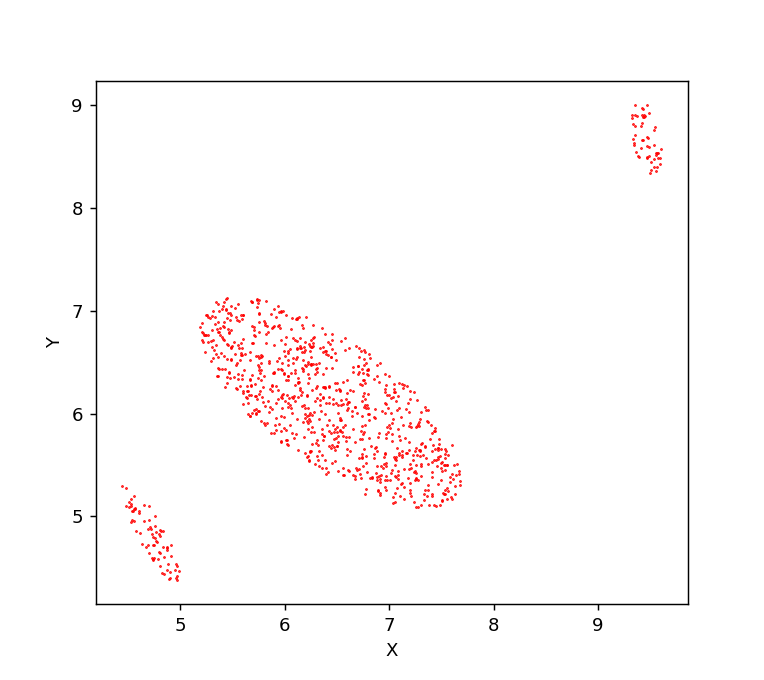

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read data
Data = pd.read_csv("points.txt")
Point = np.array([Data.x,Data.y])

fig = plt.figure( figsize=(4.5, 4) \
                , dpi= 100 \
                , facecolor='w' \
                , edgecolor='w' \
                ) # create figure object
ax = fig.add_subplot(1,1,1) # Get the axes instance

ax.plot( Point[0,:] \
       , Point[1,:] \
       , 'r.' \
       , markersize = 1 \
       ) # plot with color red, as line

ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.savefig('points.png', dpi=200) # save the figure to an external file
plt.show() # display the figure

In [2]:
def getMinVolPartition(Point):
    import numpy as np
    npoint = len(Point[0,:])
    ndim = len(Point[:,0])
    ncMax = npoint // (ndim + 1) # max number of clusters possible
    BoundingEllipsoidCenter = np.array([np.mean(Point[0,:]),np.mean(Point[1,:])])
    SampleCovMat = np.mat(np.cov(Point))
    SampleInvCovMat = np.mat(np.linalg.inv(SampleCovMat))
    PointNormed = np.mat(np.zeros((ndim,npoint)))
    for idim in range(ndim):
        PointNormed[idim,:] = Point[idim] - BoundingEllipsoidCenter[idim]
    MahalSq = PointNormed.T * SampleInvCovMat * PointNormed
    maxMahalSq = np.max(MahalSq)
    BoundingEllipsoidVolume = np.linalg.det(SampleCovMat) * maxMahalSq**ndim
    BoundingEllipsoidCovMat = SampleCovMat * maxMahalSq
    print(
    """
    nd = {}
    np = {}
    ncMax = {}
    SampleCovMat = {}
    InvCovMat = {}
    max(MahalSq) = {}
    BoundingEllipsoidCenter = {}
    BoundingEllipsoidCovMat = {}
    BoundingEllipsoidVolume = {}
    """.format( ndim
              , npoint
              , ncMax
              , SampleCovMat[:]
              , SampleInvCovMat
              , maxMahalSq
              , BoundingEllipsoidCenter
              , BoundingEllipsoidCovMat
              , BoundingEllipsoidVolume
              ))
    return BoundingEllipsoidCenter, BoundingEllipsoidCovMat

In [3]:
getMinVolPartition(Point)



    nd = 2
    np = 1000
    ncMax = 333
    SampleCovMat = [[1.0761723  0.36394188]
 [0.36394188 0.71635847]]
    InvCovMat = [[ 1.12198982 -0.5700206 ]
 [-0.5700206   1.68554491]]
    max(MahalSq) = 14.185346024371288
    BoundingEllipsoidCenter = [6.44826263 6.14296536]
    BoundingEllipsoidCovMat = [[15.26587652  5.16264153]
 [ 5.16264153 10.16179275]]
    BoundingEllipsoidVolume = 128.47580579408634
    


(array([6.44826263, 6.14296536]),
 matrix([[15.26587652,  5.16264153],
         [ 5.16264153, 10.16179275]]))

In [4]:
def getRandMVU(numRandMVU,MeanVec,CovMat,isInside=True):
    """
    generates numRandMVU uniformly-distributed random points from 
    inside an ndim-dimensional ellipsoid with Covariance Matrix CovMat, 
    centered at MeanVec[0:ndim].
    Output:
        Numpy matrix of shape numRandMVU by ndim
    """
    import numpy as np
    ndim = len(MeanVec)
    AvgStdMVN = np.zeros(ndim)
    CovStdMVN = np.eye(ndim)
    RandStdMVN = np.random.multivariate_normal(AvgStdMVN,CovStdMVN,numRandMVU)
    DistanceSq = np.sum(RandStdMVN**2, axis=1)
    #print(len(DistanceSq))
    if isInside:
        UnifRnd = np.random.random((numRandMVU,))
        UnifRnd = (UnifRnd**(1./ndim)) / np.sqrt(DistanceSq)

    CholeskyLower = np.linalg.cholesky(np.mat(CovMat))
    #print(CholeskyLower[1,0])
    RandMVU = np.zeros(np.shape(RandStdMVN))
    for iRandMVU in range(numRandMVU):
        if isInside:
            RandStdMVN[iRandMVU] *= UnifRnd[iRandMVU]
        else:
            RandStdMVN[iRandMVU] /= np.sqrt(DistanceSq[iRandMVU])
        for i in range(ndim):
            RandMVU[iRandMVU,i] = RandMVU[iRandMVU,i] + CholeskyLower[i,i] * RandStdMVN[iRandMVU,i]
            for j in range(i+1,ndim):
                RandMVU[iRandMVU,j] = RandMVU[iRandMVU,j] + CholeskyLower[j,i] * RandStdMVN[iRandMVU,i]
        RandMVU[iRandMVU] += MeanVec
    return RandMVU


    nd = 2
    np = 1000
    ncMax = 333
    SampleCovMat = [[1.0761723  0.36394188]
 [0.36394188 0.71635847]]
    InvCovMat = [[ 1.12198982 -0.5700206 ]
 [-0.5700206   1.68554491]]
    max(MahalSq) = 14.185346024371288
    BoundingEllipsoidCenter = [6.44826263 6.14296536]
    BoundingEllipsoidCovMat = [[15.26587652  5.16264153]
 [ 5.16264153 10.16179275]]
    BoundingEllipsoidVolume = 128.47580579408634
    


<IPython.core.display.Javascript object>


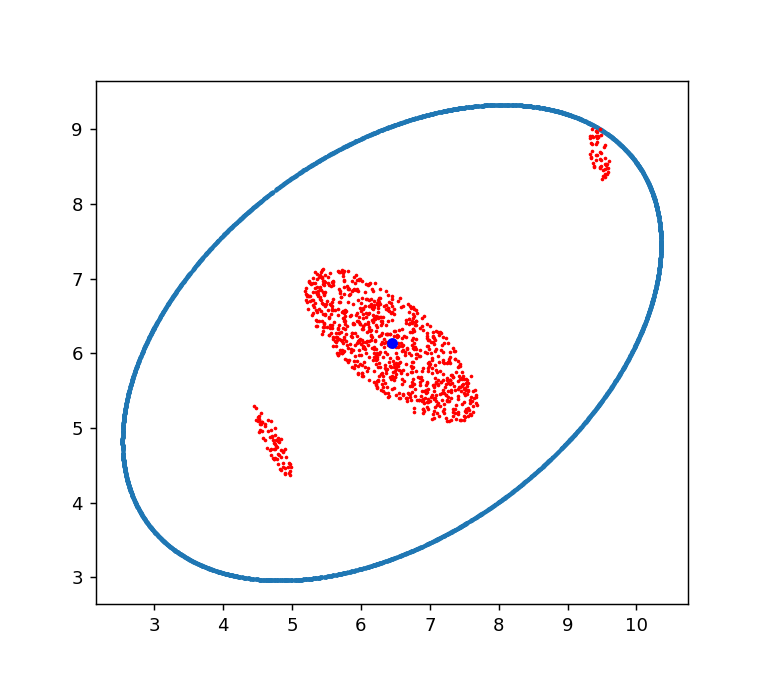

In [5]:
MeanVec, CovMat = getMinVolPartition(Point)
RandMVU = getRandMVU( numRandMVU=10000
                    , MeanVec=MeanVec
                    , CovMat=CovMat
                    , isInside = False
                    )
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure( figsize=(4.5, 4) \
                , dpi= 100 \
                , facecolor='w' \
                , edgecolor='w' \
                ) # create figure object

# plot the points
plt.plot( Point[0,:] \
        , Point[1,:] \
        , 'r.' \
        , markersize = 2 \
        )

# plot the center point
plt.plot( MeanVec[0] \
        , MeanVec[1] \
        , 'b.' \
        , markersize = 10 \
        )

# plot the bounding ellipsoid
plt.scatter(RandMVU[:,0],RandMVU[:,1],1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()